# Kaggle Titanic Machine Learning From Disaster 
Analysis in Python by Luke Kim 

This is another analysis of the Kaggle Titanic Machine Learning competition in Python following my analysis in R. This is so that I can get a chance to become familiar with machine learning tools in Python. 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

titanic_df = pd.read_csv('./train.csv') 
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print("Train data information") 
print(titanic_df.info())

Train data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


From the above information, we see that Age, Cabin and Embarked columns each have 177,608 and 2 NULL values. For Age, we can replace all NA values with the average, for the rest, let us replace it with the categorical "N". 

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print("Number of NULL data = {}".format(titanic_df.isnull().sum().sum())) 

Number of NULL data = 0


Let us now look at the distributions of the categorical features Sex, Cabin and Embarked.  

In [7]:
print('Distribution of Sex:\n',titanic_df['Sex'].value_counts()) 
print('Distribution of Cabin:\n',titanic_df['Cabin'].value_counts())
print('Distribution of Embarked:\n',titanic_df['Embarked'].value_counts())

Distribution of Sex:
 male      577
female    314
Name: Sex, dtype: int64
Distribution of Cabin:
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
B19              1
E38              1
C103             1
A24              1
D10 D12          1
Name: Cabin, Length: 148, dtype: int64
Distribution of Embarked:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


It appears that the data for Cabin is a bit disorganized. It seems like the seats are distinguished by the letter and the numbers that follow just add confusion to the data. Let's just obtain the first letter of the seats for the Cabin data. 

In [10]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] 
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


Let's explore the data a bit more. Our guess is that women (and probably children) were saved with priority. 

In [12]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count() 

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It seems like 74.2% of the women survived, but only 18.8% of the men survived. Let use illustrate this as a barplot. 

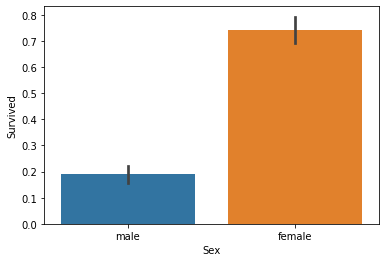

In [14]:
sns.barplot(x='Sex',y='Survived',data=titanic_df) 

So we do see the data confirming our hypothesis. Next let us see if the wealth background of the titanic passengers played a role in survival. Our guess is that it affected the survival of the titanic passengers. 

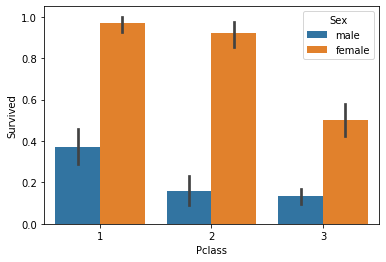

In [16]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

We see that those in the 1st class are more likely to survive (both men and women). Across all the 3 classes, women have a higher survival rate, but when it comes to class 3, we see that the survival rate drastically decreases compared to class 1 for both men and women. This confirms our hypothesis that the wealthy had a higher survival rate. Let us now see if age affected survival. 

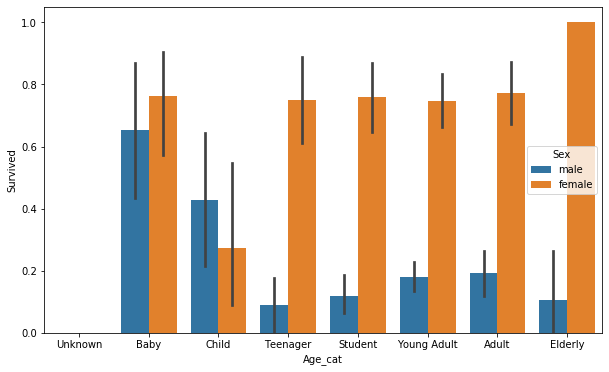

In [17]:
def get_category(age): 
    cat = '' 
    if age <= -1: 
        cat = 'Unknown' 
    elif age <= 5: 
        cat = 'Baby'
    elif age <= 12:  
        cat = 'Child'
    elif age <= 18: 
        cat = 'Teenager' 
    elif age <= 25: 
        cat = 'Student' 
    elif age <= 35: 
        cat = 'Young Adult' 
    elif age <= 60: 
        cat = 'Adult' 
    else:
        cat = 'Elderly' 
    return cat 

plt.figure(figsize=(10,6))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly'] 
# apply lambda function 
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x :  get_category(x)) 
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names) 
titanic_df.drop('Age_cat',axis=1,inplace=True) 

We see that elderly women had an extremely high chance of survival, and babies (childern under the age of 5) had a very high survival too. Children in the age range 6-12 had a surprisingly low survival rate. Anyways we do see a pattern in the survival rate depending on age: extremely young people and old people tend to have a higher survival rate. Overall from our preliminary data analysis, we see that Sex (gender), Wealth and Age all are important features for determining survival. 

Next, let's try to apply encoding to categorical variables, as this normally helps with training. 

In [18]:
from sklearn import preprocessing
def encode_features(dataDF): 
    features = ['Cabin','Sex','Embarked'] 
    for feature in features: 
        le = preprocessing.LabelEncoder() 
        le = le.fit(dataDF[feature]) 
        dataDF[feature] = le.transform(dataDF[feature]) 
    return dataDF 

titanic_df = encode_features(titanic_df)
titanic_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


We see that the categorical variables Cabin, Sex and Embarked all changed to integer encodings. So far, we have done preliminary data analysis, and looked at ways to deal with missing values as well as how we could convert categorical features to encodings. Let us go a step further from here and create functions that do data pre-processing. Specifically, we want to do the following 

1. Create a function to fill in all the NA values 

2. Get rid of features that will not help training our model (but will add confusion instead). These features would be things like ticket information or name because they are just strings or numbers that are not indicative at all for predicting survival.  

3. Conducts categorical feature encoding as we have done above. 

In [21]:
def fillna(df): 
    # inplace=True means replace the actual data frame 
    df['Age'].fillna(df['Age'].mean(),inplace=True) # replace by mean 
    df['Cabin'].fillna('N',inplace=True) # replace as N 
    df['Embarked'].fillna('N',inplace=True) # replace as N 
    df['Fare'].fillna(0,inplace=True) 
    return df 

def drop_features(df): 
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True) 
    return df 

def format_features(df): 
    df['Cabin'] = df['Cabin'].str[:1] # take first letter of Cabin 
    features = ['Cabin','Sex','Embarked'] 
    for feature in features: 
        le = preprocessing.LabelEncoder() 
        le = le.fit(df[feature]) 
        df[feature] = le.transform(df[feature])
    return df 

def transform_features(df): 
    df = fillna(df) 
    df = drop_features(df) 
    df = format_features(df) 
    return df 

titanic_df = pd.read_csv('./train.csv') 
Y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1) 
X_titanic_df = transform_features(X_titanic_df) 

In [22]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


Now we perfrom train/test split on the train.csv data to tune some of the models we are using. Specifically, we will be using DecisionTreeClassifier, RandomForestClassifer and LogisticRegression provided by sklearn. 

In [24]:
from sklearn.model_selection import train_test_split 
X_train,X_val,Y_train,Y_val = train_test_split(X_titanic_df,Y_titanic_df,test_size=0.2,random_state=11)

In [29]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

dt_clf = DecisionTreeClassifier(random_state=42) 
rf_clf = RandomForestClassifier(random_state=42)
lr_clf = LogisticRegression(max_iter=10000) # to prevent non-convergence issue  

# Decision Tree
dt_clf.fit(X_train,Y_train) 
dt_pred = dt_clf.predict(X_val) 
print('DecisionTreeClassifier accuracy: {}'.format(accuracy_score(Y_val,dt_pred))) 

# Random Forest 
rf_clf.fit(X_train,Y_train) 
rf_pred = rf_clf.predict(X_val) 
print("RandomForestClassifier accuracy: {}".format(accuracy_score(Y_val,rf_pred))) 

#Logistic Regression 
lr_clf.fit(X_train,Y_train) 
lr_pred = lr_clf.predict(X_val)
print("LogisticRegression accuracy: {}".format(accuracy_score(Y_val,lr_pred))) 

DecisionTreeClassifier accuracy: 0.7877094972067039
RandomForestClassifier accuracy: 0.8659217877094972
LogisticRegression accuracy: 0.8491620111731844


It appears that RandomForest performs the best. However, because we did not test on a lot of data, and no tuning has been done for RandomForest and DecisionTree we cannot really say which model does the best yet. Let us try to tune the DescisionTreeClassifier using the KFold class. 

In [32]:
from sklearn.model_selection import KFold 

def exec_kfold(clf,folds=5): 
    kfold = KFold(n_splits=folds) 
    scores = [] 
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):  
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index] 
        Y_train, Y_test = Y_titanic_df.values[train_index], Y_titanic_df.values[test_index] 
        clf.fit(X_train,Y_train) 
        predictions = clf.predict(X_test) 
        accuracy = accuracy_score(Y_test,predictions) 
        scores.append(accuracy) 
        print("Cross validation {} accuracy: {}".format(iter_count,accuracy)) 
    mean_score = np.mean(scores)
    print("Average Accuracy: {}".format(mean_score)) 

exec_kfold(dt_clf,folds=5)

Cross validation 0 accuracy: 0.7318435754189944
Cross validation 1 accuracy: 0.7640449438202247
Cross validation 2 accuracy: 0.8089887640449438
Cross validation 3 accuracy: 0.7752808988764045
Cross validation 4 accuracy: 0.8314606741573034
Average Accuracy: 0.7823237712635741


We can conduct the same procedure using the function cross_val_score() in sklearn. 

In [35]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(dt_clf,X_titanic_df,Y_titanic_df,cv=5)
for iter_counts, accuracy in enumerate(scores): 
    print("Cross validation {} accuracy: {}".format(iter_counts,accuracy)) 

print("Average Accuracy: {}".format(np.mean(scores))) 

Cross validation 0 accuracy: 0.7653631284916201
Cross validation 1 accuracy: 0.7808988764044944
Cross validation 2 accuracy: 0.797752808988764
Cross validation 3 accuracy: 0.7752808988764045
Cross validation 4 accuracy: 0.8258426966292135
Average Accuracy: 0.7890276818780994


The average accuracy seems to be slighlty better when we used cross_val_score() because it uses StratiedKFold, or makes sure that the proportion of labels is the same for each fold. We finally tune using GridSearchCV with folds=5. 

In [38]:
from sklearn.model_selection import GridSearchCV 

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,Y_train) 
print("GridSearchCV best hyperparameters:",grid_dclf.best_params_) 
print("GridSearchCV best accuracy:{}".format(grid_dclf.best_score_)) 
best_dclf = grid_dclf.best_estimator_ 

dpred = best_dclf.predict(X_val)
accuracy = accuracy_score(Y_val,dpred) 
print("Accuracy = {}".format(accuracy))

GridSearchCV best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV best accuracy:0.7991825076332119
Accuracy = 0.8715083798882681


We see a pretty big increase in accuracy on the validation set with hyperparameter tuned decision tree. Let's try to make predictions on the test data.  

In [42]:
test_df = pd.read_csv('./test.csv')
passenger_id = test_df['PassengerId'] 
test_df = transform_features(test_df) # process test data  
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1
3,3,1,27.0,0,0,8.6625,7,2
4,3,0,22.0,1,1,12.2875,7,2


In [44]:
dpred = best_dclf.predict(test_df) 

In [45]:
submission = pd.DataFrame(list(zip(passenger_id, dpred)), columns =['PassengerId', 'Survived'])
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
submission.to_csv('best_decisiontree.csv',index = False, header=True) 

Upon submitting on Kaggle, I get an accuracy of 78.9% on the Kaggle leaderboard. This is worse than the tuned gradient boosting model (GBM) I used in my analysis using R https://github.com/iljimae0418/Kaggle-Titanic-Machine-Learning-From-Disaster/blob/master/Titanic%20ML%20learning%20from%20disaster.Rmd as I received a public leaderboard score of 79.4% accuracy. Furthermore, this is also worse than the approach of using cateogrical boosting https://github.com/iljimae0418/Kaggle-Titanic-Machine-Learning-From-Disaster/blob/master/catboost_test2.py which results in 80.1% accuracy on the public leaderboard. 

Upon more research on Kaggle, however, there seems to be a very simplistic approach that reaches above 80% accuracy on the Kaggle public leaderboard. The rule is as follows: 

1. If the person is a boy and if all the females and boys in his family live, then the boy survives else he dies   

2. If the person is a female and if all the females and the boys in her family dies, then the female dies else she lives.  

Here, boys are defined as passengers with the title "Master", and families are defined as groups of people with the same surname. The only catch is that we group the family by ticket not by surname, because there is a chance that people with the same surnames are not necessarily related, but it makes sense that families (or people considered close to one another) travelled together. The method is explained in detail in this notebook: https://www.kaggle.com/jack89roberts/titanic-using-ticket-groupings but let me reproduce the code here as well.  

In [119]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
boy = (train_df.Name.str.contains('Master')) | ((train_df.Sex=='male') & (train_df.Age<13))
female = train_df.Sex=='female'
boy_or_female = boy | female

# no. females + boys on ticket
n_ticket = train_df[boy_or_female].groupby('Ticket').Survived.count()

# survival rate amongst females + boys on ticket
tick_surv = train_df[boy_or_female].groupby('Ticket').Survived.mean()


In [120]:
def create_features(frame):
    frame['Boy'] = (frame.Name.str.contains('Master')) | ((frame.Sex=='male') & (frame.Age<13))
    
    frame['Female'] = (frame.Sex=='female').astype(int)

    # if ticket exists in training data, fill NTicket with no. women+boys
    # on that ticket in the training data.
    frame['NTicket'] = frame.Ticket.replace(n_ticket)
    # otherwise NTicket=0
    frame.loc[~frame.Ticket.isin(n_ticket.index),'NTicket']=0

    # if ticket exists in training data, fill TicketSurv with
    # women+boys survival rate in training data  
    frame['TicketSurv'] = frame.Ticket.replace(tick_surv)
    # otherwise TicketSurv=0
    frame.loc[~frame.Ticket.isin(tick_surv.index),'TicketSurv']=0

    # return data frame only including features needed for prediction
    return frame[['Female','Boy','NTicket','TicketSurv']] 

def did_survive(row):
    if row.Female:
        # predict died if all women+boys on ticket died
        if (row.NTicket>0) and (row.TicketSurv==0):
            return 0
        # predict survived for all other women
        else:
            return 1
        
    elif row.Boy:
        # predict survived if all women+boys on ticket survived
        if (row.NTicket>0) and (row.TicketSurv==1):
            return 1
        # predict died for all other boys
        else:
            return 0
        
    else:
        # predict all men die
        return 0

X = create_features(test_df)

# predict test data
pred = X.apply(did_survive,axis=1)

In [121]:
submission = pd.DataFrame(list(zip(passenger_id, pred)), columns =['PassengerId', 'Survived'])
submission.head()  

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [107]:
submission.to_csv('name_model.csv',index = False, header=True)

To conclude, the Titanic contest is a classic ML competition and I had a chance to try out many classification models in R as well as Python. It was also very interesting for me to see that people used very simple prediction models like the name model above to get prediction accuracies that exceed tuning decision tree models. Also there seemed to be people applying neural networks for this problem such as this Kaggle notebook: https://www.kaggle.com/goldsack/titanic-solution-using-neuralnet. Perhaps I will come back again to this competition later to make further progress and do more research (if time allows). 